# WEEK 2 PROJECT: CLASSIFICATION

## Load libraries

In [1]:
import pandas as pd # to import data
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data vsualization

# Libraries for ML classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Read and visualize the data set

In [242]:
df = pd.read_csv("train.csv", index_col=0)

In [ ]:
sns.scatterplot(x='Fare', y='Survived',
            data=df, alpha=0.6)

In [ ]:
sns.scatterplot(x='Age', y='Survived',
            data=df, alpha=0.6)

In [ ]:
sns.scatterplot(x='SibSp', y='Survived',
            data=df, alpha=0.6)

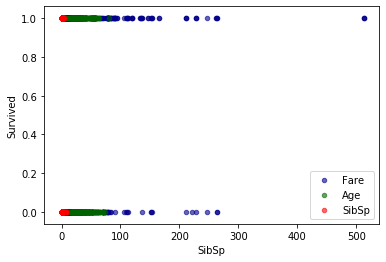

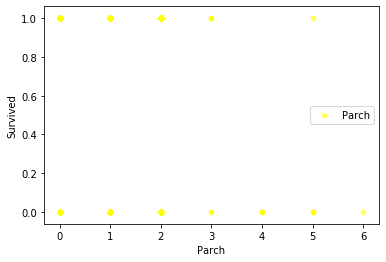

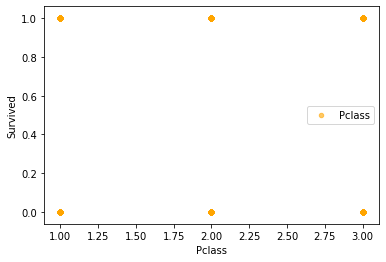

In [243]:
ax=df.plot(kind='scatter', x='Fare', y='Survived', color='DarkBlue', label='Fare',alpha=0.6)
ax=df.plot(kind='scatter', x='Age', y='Survived', color='DarkGreen', label='Age', alpha=0.6, ax=ax)
ax=df.plot(kind='scatter', x='SibSp', y='Survived', color='Red', label='SibSp', alpha=0.6, ax=ax) # Not realy meaningfull
ax=df.plot(kind='scatter', x='Parch', y='Survived', color='Yellow', label='Parch', alpha=0.6 )
ax=df.plot(kind='scatter', x='Pclass', y='Survived', color='Orange', label='Pclass', alpha=0.6)

## FEATURE ENGENEERING the DB

In [ ]:
df.nunique()

#### Fix Nan

In [41]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

Fix Nan in 'Embarked' by adding the mode (or most common value, at the end there are only 2 values, not very informative)

In [ ]:
df.groupby(['Sex','Survived'])['Embarked'].value_counts()/len(df) #slighly predictive!

In [39]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) # Substitute missing 'Embarked' data with the mode (S)

Fix Nan in 'Age' by substitute with the median of the group (group by Sex and Survived and Class - beacause I think are the most likely variables to take part to the surviving of the passenger)

In [ ]:
df.groupby(['Sex','Survived', 'Pclass'])['Age'].median() 

In [40]:
df['Age'].fillna(df['Age'].median(), inplace=True) 
#df['Age'].fillna(df['Embarked'].mode()[0], inplace=True)
#df.loc[df['Sex']!= 'Age']=df.groupby(['Sex'])['Age'].median()


# Note I did only groupy SEX, need to change

In [ ]:
df.isna().sum()

In [ ]:
df.groupby(['Sex'])['Age'].median()

In [ ]:
df['Age'].fillna(df.groupby(['Sex', 'Survived', 'Pclass'])['Age'].median()) #looks  bit complicated

 Age binning

In [ ]:
df.Age.median(), df.Age.min(),df.Age.max()

In [ ]:
plt.hist(df['Age']) # have a look to the 'Age' distribution before binning it

In [5]:
df['Age_Bin_QCUT'] = pd.qcut(df['Age'], 8) # data binned in 8 classes

In [ ]:
df

Fix Nan in 'Cabin', looks like there are many Nan in cabin, so I create 0 1 colum (cabin=1, no cabin=0)

In [42]:
df['Cabin'].fillna(0, inplace=True)

In [43]:
df.loc[df['Cabin']!= 0, 'Cabin']=1 

In [ ]:
df.Cabin

#### One hot Encoding over 1. Age binning, 2. Class, 3. Embarked, 4. Sex

In [ ]:
pd.get_dummies(df['Age_Bin_QCUT'])

In [8]:
df= df.merge(pd.get_dummies(df['Age_Bin_QCUT'], drop_first=True), left_index=True, right_index=True) # Dummy encoder over age bin groups

In [45]:
df= df.merge(pd.get_dummies(df['Pclass'], drop_first=True), left_index=True, right_index=True)  # Dummy encoder over Class

In [46]:
df= df.merge(pd.get_dummies(df['Embarked'], drop_first=True), left_index=True, right_index=True) # Dummy encoder over Embarked

In [47]:
df= df.merge(pd.get_dummies(df['Sex']), left_index=True, right_index=True)  # Dummy encoder over Sex

In [48]:
list(df.columns)

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 2,
 3,
 'Q',
 'S',
 'male']

### Split the dataset into test and training

In [18]:
X = df.drop(["Survived","Pclass","Embarked","Age_Bin_QCUT","Name","Sex","Age","Parch","Ticket","Fare"], axis=1)

y = df["Survived"]

In [19]:
X

,SibSp,Cabin,"(17.0, 22.0]","(22.0, 27.0]","(27.0, 28.0]","(28.0, 29.0]","(29.0, 35.0]","(35.0, 45.0]","(45.0, 80.0]",2,3,Q,S,male
PassengerId,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,0,0,1,0,1,1
2,1,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,1,0
4,1,1,0,0,0,0,1,0,0,0,0,0,1,0
5,0,0,0,0,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,0,1,0,0,0,0,0,1,0,0,1,1
888,0,1,1,0,0,0,0,0,0,0,0,0,1,0
889,1,0,0,0,1,0,0,0,0,0,1,0,1,0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True) 

In [69]:
y_train

PassengerId
302    1
310    1
517    1
121    0
571    1
      ..
716    0
768    0
73     0
236    0
38     0
Name: Survived, Length: 712, dtype: int64

### Normilize the data (scale)

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [87]:
X_train = scaler.transform(X_train)

In [88]:
X_test = scaler.transform(X_test)

# Make a prediction using: 1. FIT

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 

In [82]:
model_fit=DummyClassifier(strategy='most_frequent') # Initialize the baseline project
model_fit.fit(X_train,y_train) # Train the model
model_fit.predict(X_train) # Predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [93]:
scores = cross_val_score(model_fit, X_train, y_train, cv=5) # cv= number of cross validation (typically 5)
train_fit_Xscore=scores.round(3) 
print(train_fit_Xscore)

[0.622 0.622 0.62  0.62  0.627]


In [113]:
test_fit_predict=model_fit.predict(X_test) # predict and calculate the score on the TEST dataset
test_fit_score= model_fit.score(X_test,y_test)
print(test_fit_score)

0.5921787709497207


In [63]:
p_fit=model_fit.predict_proba(X_test).round(2) # Probability

In [150]:
accuracy_score(y_test, test_fit_predict) #compare predictive results to actual results

0.5921787709497207

In [151]:
test_fit_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

# Make a prediction using: 2. LOGISTIC REGRESSION

Import libraries for Logistic regression

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

For the logistic regression I don't bin the 'Age' and the 'Fare', but I use the numbers (not sure it makes sense)

In [50]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,2,3,Q,S,male
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,1,0,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,0,0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,1,0,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,0,0,0,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,1,0,0,1,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1,S,0,0,0,1,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S,0,1,0,1,0


In [51]:
df.columns

Index(['Survived',   'Pclass',     'Name',      'Sex',      'Age',    'SibSp',
          'Parch',   'Ticket',     'Fare',    'Cabin', 'Embarked',          2,
                3,        'Q',        'S',     'male'],
      dtype='object')

In [66]:
X = df.drop(["Survived","Pclass","Embarked","Name","Sex","Parch","Ticket"], axis=1)

y = df["Survived"]

In [67]:
X

,Age,SibSp,Fare,Cabin,2,3,Q,S,male
PassengerId,,,,,,,,,
1,22.0,1,7.2500,0,0,1,0,1,1
2,38.0,1,71.2833,1,0,0,0,0,0
3,26.0,0,7.9250,0,0,1,0,1,0
4,35.0,1,53.1000,1,0,0,0,1,0
5,35.0,0,8.0500,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
887,27.0,0,13.0000,0,1,0,0,1,1
888,19.0,0,30.0000,1,0,0,0,1,0
889,28.0,1,23.4500,0,0,1,0,1,0


Scale

In [55]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Model

In [109]:
model_logreg = LogisticRegression(max_iter=10000)# penalty='none'
model_logreg.fit(X_train, y_train)
model_logreg.score(X_train, y_train) # get the SCORE

0.8314606741573034

In [126]:
test_logreg_score=model_logreg.score(X_test, y_test)

In [121]:
test_logreg_predict=model.predict_proba(X_test).round(2) # Probability

In [122]:
test_logreg_predict

array([[0.1 , 0.9 ],
       [0.95, 0.05],
       [0.05, 0.95],
       [0.36, 0.64],
       [0.05, 0.95],
       [0.93, 0.07],
       [0.58, 0.42],
       [0.06, 0.94],
       [0.8 , 0.2 ],
       [0.46, 0.54],
       [0.94, 0.06],
       [0.52, 0.48],
       [0.62, 0.38],
       [0.82, 0.18],
       [0.36, 0.64],
       [0.56, 0.44],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.95, 0.05],
       [0.4 , 0.6 ],
       [0.89, 0.11],
       [0.94, 0.06],
       [0.05, 0.95],
       [0.76, 0.24],
       [0.15, 0.85],
       [0.94, 0.06],
       [0.08, 0.92],
       [0.24, 0.76],
       [0.81, 0.19],
       [0.17, 0.83],
       [0.45, 0.55],
       [0.56, 0.44],
       [0.65, 0.35],
       [0.63, 0.37],
       [0.9 , 0.1 ],
       [0.52, 0.48],
       [0.57, 0.43],
       [0.95, 0.05],
       [0.53, 0.47],
       [0.93, 0.07],
       [0.52, 0.48],
       [0.52, 0.48],
       [0.14, 0.86],
       [0.62, 0.38],
       [0.32, 0.68],
       [0.89, 0.11],
       [0.96, 0.04],
       [0.83,

In [106]:
scores = cross_val_score(model_logreg, X_train, y_train, cv=5) # cv= number of cross validation (typically 5)
train_logreg_Xscore=scores.round(3) 
print(train_logreg_Xscore)

[0.776 0.825 0.838 0.838 0.845]


## Make a prediction using: 3. RANDOM FOREST

In [76]:
#from sklearn.model_selection import train_test_split #to split data

from sklearn.ensemble import RandomForestClassifier

In [96]:
model_forest = RandomForestClassifier(n_estimators=100, max_depth=2, max_features=1) # Run the model
model_forest.fit(X_train,y_train)
model_forest.score(X_train, y_train) 

0.699438202247191

In [127]:
test_forest_score= model_forest.score(X_test, y_test)

In [99]:
model_forest_test_score=model_forest.score(X_test, y_test) # Test score
print(model_forest_test_score)

0.6368715083798883


In [102]:
scores = cross_val_score(model_forest, X_train, y_train, cv=5) # cv= number of cross validation (typically 5)
train_forest_Xscore=scores.round(3) 
print(train_forest_Xscore)

[0.734 0.671 0.634 0.69  0.711]


## Compare models 

### 1. using Confusion Matrix

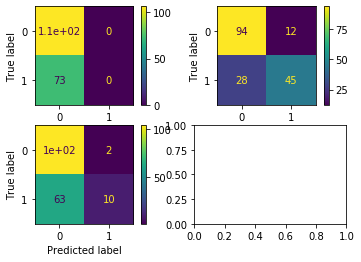

In [234]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(2, 2)
plot_confusion_matrix(model_fit, X_test, y_test, normalize=None, ax=axes[0,0])
plot_confusion_matrix(model_logreg, X_test, y_test, normalize=None, ax=axes[0,1])
plot_confusion_matrix(model_forest, X_test, y_test, normalize=None, ax=axes[1,0])

### 2. using ROC curve

In [64]:
from sklearn.metrics import plot_roc_curve, roc_curve, auc # Import library

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((712, 14), (179, 14), (712,), (179,))

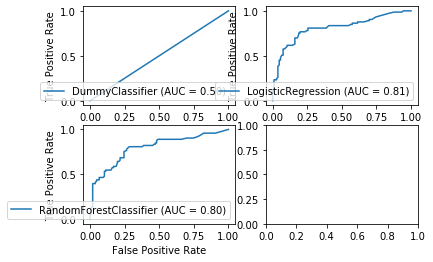

In [236]:
fig, axes = plt.subplots(2, 2)

plot_roc_curve(model_fit, X_test, y_test, ax=axes[0,0]) 
plot_roc_curve(model_logreg, X_test, y_test, ax=axes[0,1]) 
plot_roc_curve(model_forest, X_test, y_test, ax=axes[1,0]) 
plt.show()

### 3. Comparing Scores X-val and score test val

In [124]:
train_fit_Xscore, train_logreg_Xscore, train_forest_Xscore

(array([0.622, 0.622, 0.62 , 0.62 , 0.627]),
 array([0.776, 0.825, 0.838, 0.838, 0.845]),
 array([0.734, 0.671, 0.634, 0.69 , 0.711]))

In [129]:
test_fit_score, test_logreg_score, test_forest_score

(0.5921787709497207, 0.776536312849162, 0.6368715083798883)

In [153]:
test_scores= pd.DataFrame([test_fit_score, test_logreg_score, test_forest_score])
test_scores

,0
0,0.592179
1,0.776536
2,0.636872


In [176]:
# Create a df_scores for the barplot
df_scores=pd.DataFrame([train_fit_Xscore, train_logreg_Xscore,train_forest_Xscore])
df_scores= pd.concat([df_scores, test_scores],axis=1)

,0,1,2,3,4,0
0,0.622,0.622,0.620,0.620,0.627,0.592179
1,0.776,0.825,0.838,0.838,0.845,0.776536
2,0.734,0.671,0.634,0.690,0.711,0.636872


In [201]:
df_scores=pd.DataFrame({'fit_score':train_fit_Xscore, 'logreg_score':train_logreg_Xscore,'forest_score':train_forest_Xscore})

In [197]:
df_test=pd.DataFrame(test_scores).transpose()
df_test.rename(columns={0: 'fit_score',1: 'logreg_score',2: 'forest_score'},inplace=True)

In [198]:
df_scores.append(df_test)

,fit_score,logreg_score,forest_score
0,0.622000,0.776000,0.734000
1,0.622000,0.825000,0.671000
2,0.620000,0.838000,0.634000
3,0.620000,0.838000,0.690000
4,0.627000,0.845000,0.711000
0,0.592179,0.776536,0.636872


In [ ]:
# Plot the mean of the Xscore, and the corrispective test score for the 3 models compared

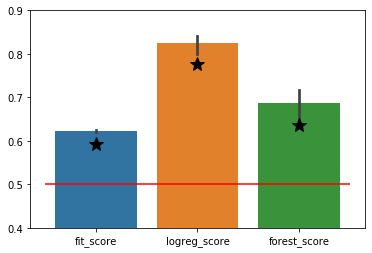

In [220]:
sns.barplot(data=df_scores)
plt.ylim([0.4,0.9])
plt.plot(df_scores.columns, test_scores, '*', color='black', markersize=15)
plt.hlines(0.5, -0.5,2.5,color='red')